In [ ]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import statsmodels.api as sm

### Загружаем данные

In [ ]:
item = 'OFP' # Выбрать из поля Item для вашего датасета
package = 'Ecdat' # Выбрать из поля Package для вашего датасета

df = sm.datasets.get_rdataset(item, package , cache=True).data
df.head()

,ofp,ofnp,opp,opnp,emr,hosp,numchron,adldiff,age,black,sex,maried,school,faminc,employed,privins,medicaid,region,hlth
0,5,0,0,0,0,1,2,0,6.9,yes,male,yes,6,2.8810,yes,yes,no,other,other
1,1,0,2,0,2,0,2,0,7.4,no,female,yes,10,2.7478,no,yes,no,other,other
2,13,0,0,0,3,3,4,1,6.6,yes,female,no,10,0.6532,no,no,yes,other,poor
3,16,0,5,0,1,1,2,1,7.6,no,male,yes,3,0.6588,no,yes,no,other,poor
4,3,0,0,0,0,0,2,1,7.9,no,female,yes,6,0.6588,no,yes,no,other,other


### Далее идет ваше решение

Задание

1) Изучите внимательно ваш датасет и смысл переменных, которые в нем содержатся

2) Сформулируйте на базе переменных три вида гипотез:
    а) Выберите две категориальные переменные и сформулируйте гипотезу об их взаимосвязи
    б) Выберите одну категориальную и одну числовую переменную и сформулируйте гипотезу об их взаимосвязи
    в) Выберите две числовые переменные и сформулируйте гипотезу об их взаимосвязи
    
3) Для каждой гипотезы постарайтесь привести логический смысл, почему вы считаете, что эта взаимосвязь должна существовать и какую форму взаимосвязи вы ожидаете. Что это дает с практической точки зрения?

4) Для выбранных переменных проведите разведочный анализ данных. Приведите наиболее подходящие описательные статистики, частотные распределения, постройте графики, которые бы давали представление как о переменных по отдельности, так и об их взаимосвязи

5) Проведите очистку данных от пропусков, выбросов и некорректных значений любым выбранным способом. Постарайтесь обосновать этот способ.

6) Протестируйте распределение числовой переменной на соответствие нормальному. Постройте QQ-plot и гистограмму.

7) Проведите тесты гипотез из пункта (2) и сделайте выводы. Какой практический смысл имеют результаты проведенных тестов? Как их можно использовать?

8) Результат сохранить на GitHub и отправить в виде ссылки на файл + блокнота в формате ipynb

Помните, что просто посчитать - это половина задания. К каждому шагу нужны пояснения и описания. Старайтесь структурировать ваш код, чтобы он был понятен стороннуму пользователю!

In [ ]:
# а) Две категориальные переменные: Пол (Sex) и Наличие медицинской страховки (privins).
# Гипотеза об их взаимосвязи:
# Существует статистически значимая взаимосвязь между полом человека и наличием медицинской страховки, при этом женщины с большей вероятностью обладают медицинской страховкой по сравнению с мужчинами.
# Эта гипотеза подразумевает, что пол может быть фактором, влияющим на доступность или выбор медицинской страховки, и ее можно проверить с помощью статистического анализа данных о наличии страховки среди мужчин и женщин.

In [ ]:
# б) Одна категориальная переменная: Трудоустроен человек или нет (employed).
#    Одна числовая переменная: Количество визитов к врачу (ofp).
# Гипотеза об их взаимосвязи:
# Люди, имеющие постоянную работу, посещают врача реже, чем безработные, из-за более стабильного дохода и доступа к медицинским услугам, а также меньшего уровня стрессов и психологических проблем, связанных с финансовой нестабильностью.
# Эта гипотеза предполагает, что наличие работы может влиять на частоту обращений к врачу, что в свою очередь может быть связано с финансовыми возможностями, уровнем стресса и общей удовлетворенностью жизнью.

In [ ]:
# в) Две числовые переменные: Возраст (age) и Количество хронических заболеваний (numchron).
# Гипотеза об их взаимосвязи:
# С увеличением возраста человека наблюдается увеличение количества хронических заболеваний, что связано с возрастными изменениями в организме, снижением иммунной функции и накоплением факторов риска в течение жизни.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# а) Две категориальные переменные: Пол (Sex) и Наличие медицинской страховки (privins).

In [ ]:
# Описательные статистики для переменной 'Sex'
sex_stats = df['sex'].value_counts()
print("Частотное распределение переменной Sex:")
print(sex_stats)

Частотное распределение переменной Sex:
sex
female    2628
male      1778
Name: count, dtype: int64


In [ ]:
# Описательные статистики для переменной 'privins'
privins_stats = df['privins'].describe()
print("\\nОписательные статистики для переменной privins:")
print(privins_stats)

\nОписательные статистики для переменной privins:
count     4406
unique       2
top        yes
freq      3421
Name: privins, dtype: object


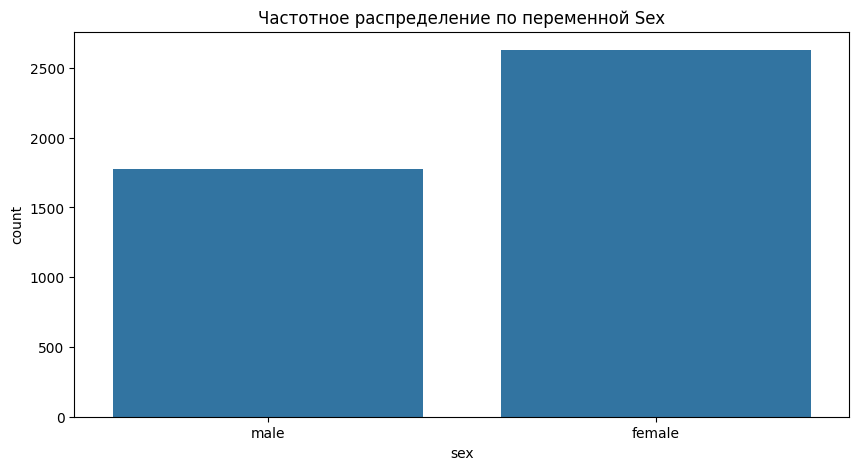

In [ ]:
# График частотного распределения Sex
plt.figure(figsize=(10, 5))
sns.countplot(x='sex', data=df)
plt.title('Частотное распределение по переменной Sex')
plt.show()

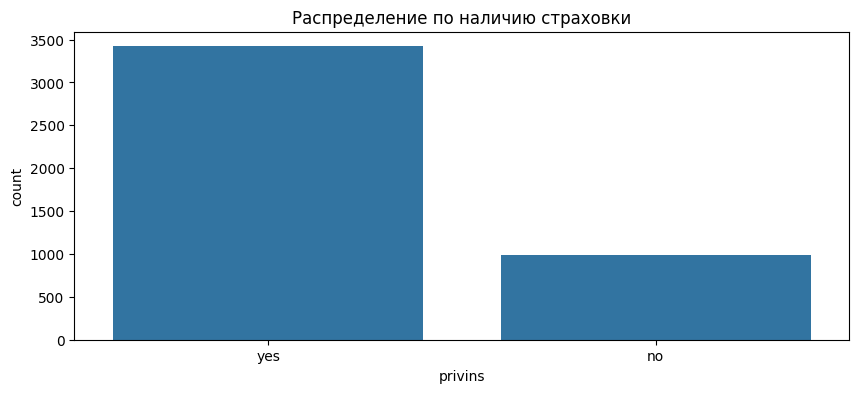

In [ ]:
# Построим график для переменной privins
plt.figure(figsize=(10, 4))
sns.countplot(x='privins', data=df)
plt.title('Распределение по наличию страховки')
plt.show()

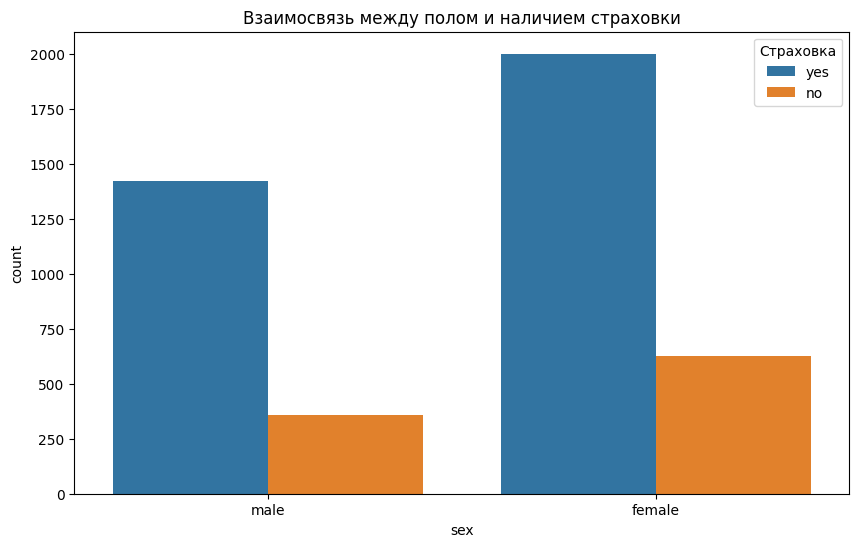

In [ ]:
# Построим график взаимосвязи
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='privins', data=df)
plt.title('Взаимосвязь между полом и наличием страховки')
plt.legend(title='Cтраховка')
plt.show()

In [ ]:
# б) Одна категориальная переменная: Трудоустроен человек или нет (employed);
#    Одна числовая переменная: Количество визитов к врачу (ofp).

In [ ]:
# Описательные статистики для переменных employed и ofp
print("Описательные статистики переменной 'employed':")
print(df['employed'].describe())

Описательные статистики переменной 'employed':
count     4406
unique       2
top         no
freq      3951
Name: employed, dtype: object


In [ ]:
print("Описательные статистики переменной 'ofp':")
print(df['ofp'].describe())

Описательные статистики переменной 'ofp':
count    4406.000000
mean        5.774399
std         6.759225
min         0.000000
25%         1.000000
50%         4.000000
75%         8.000000
max        89.000000
Name: ofp, dtype: float64


In [ ]:
# Частотное распределение для переменной 'employed'
employed_counts = df['employed'].value_counts()
print("Частотное распределение 'employed':")
print(employed_counts)

Частотное распределение 'employed':
employed
no     3951
yes     455
Name: count, dtype: int64


In [ ]:
# Построение графиков
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Частотное распределение переменной employed')

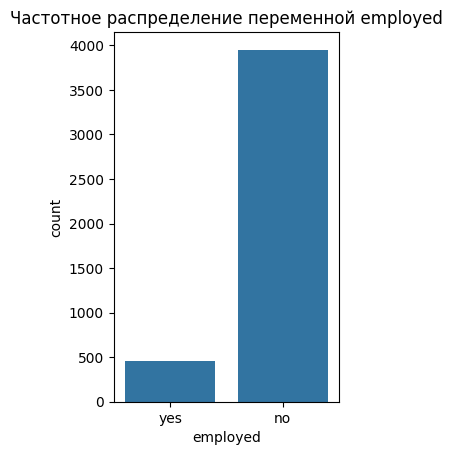

In [ ]:
# Гистограмма для переменной 'employed'
plt.subplot(1, 2, 1)
sns.countplot(x='employed', data=df)
plt.title('Частотное распределение переменной employed')

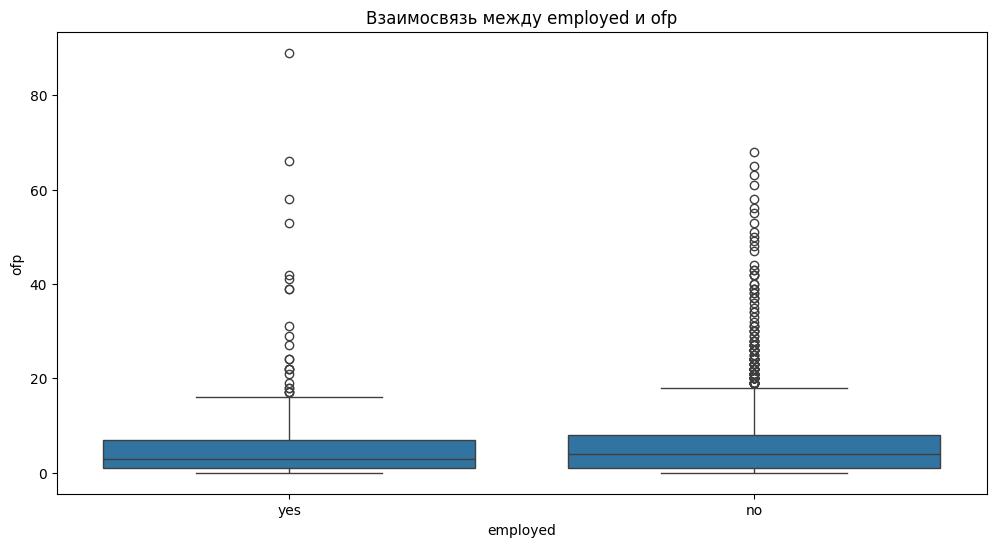

In [ ]:
# Взаимосвязь между переменными
plt.figure(figsize=(12, 6))
sns.boxplot(x='employed', y='ofp', data=df)
plt.title('Взаимосвязь между employed и ofp')
plt.show()

In [ ]:
# в) Две числовые переменные: Возраст (age) и Количество хронических заболеваний (numchron).

In [ ]:
# Описательные статистики для age и numchron
desc_stats = df[['age', 'numchron']].describe()
print(desc_stats)

               age     numchron
count  4406.000000  4406.000000
mean      7.402406     1.541988
std       0.633405     1.349632
min       6.600000     0.000000
25%       6.900000     1.000000
50%       7.300000     1.000000
75%       7.800000     2.000000
max      10.900000     8.000000


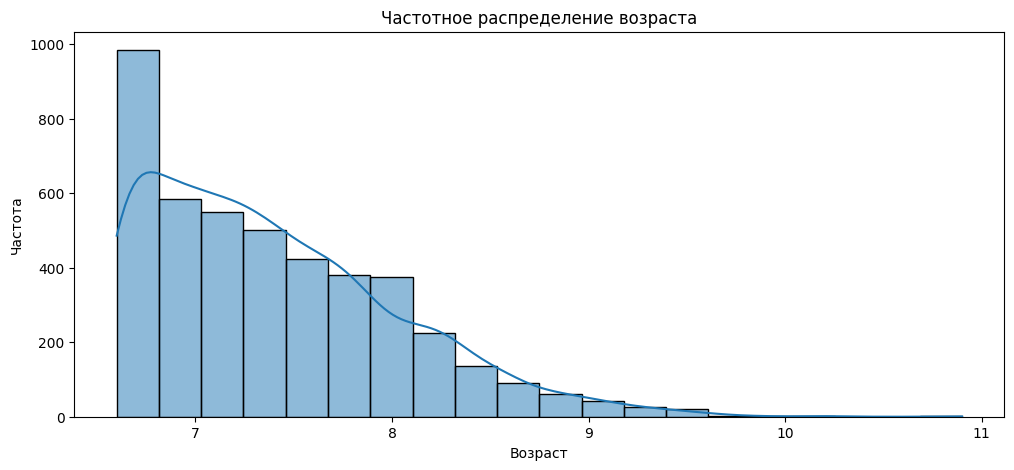

In [ ]:
# Частотное распределение для age
plt.figure(figsize=(12, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Частотное распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

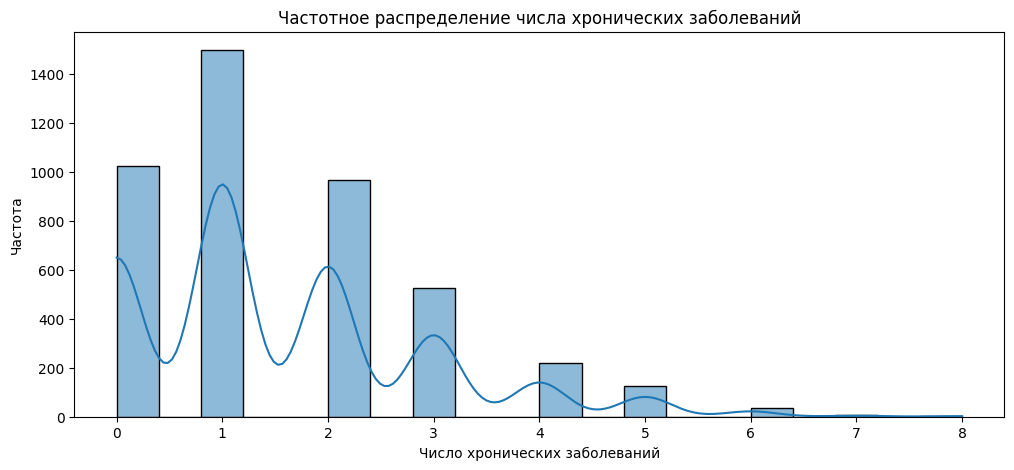

In [ ]:
# Частотное распределение для numchron
plt.figure(figsize=(12, 5))
sns.histplot(df['numchron'], bins=20, kde=True)
plt.title('Частотное распределение числа хронических заболеваний')
plt.xlabel('Число хронических заболеваний')
plt.ylabel('Частота')
plt.show()

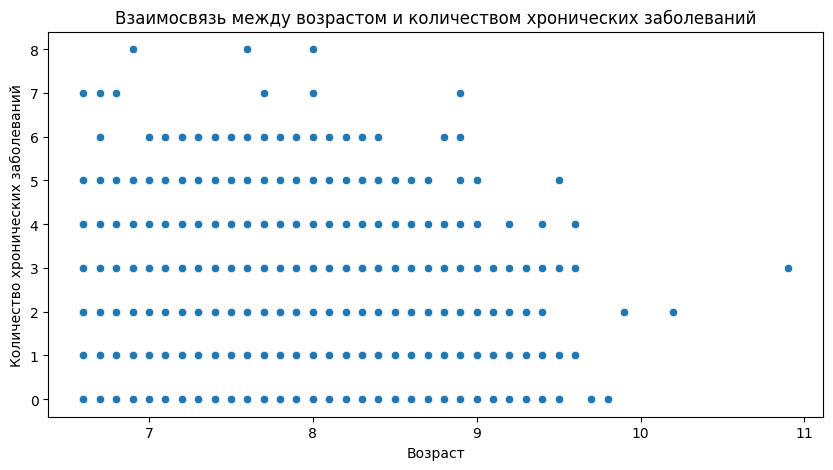

In [ ]:
# Взаимосвязь между age и numchron
plt.figure(figsize=(10, 5))
sns.scatterplot(x='age', y='numchron', data=df)
plt.title('Взаимосвязь между возрастом и количеством хронических заболеваний')
plt.xlabel('Возраст')
plt.ylabel('Количество хронических заболеваний')
plt.show()

In [ ]:
#Проверяем, есть ли пропуски.
df.isna().sum()

ofp         0
ofnp        0
opp         0
opnp        0
emr         0
hosp        0
numchron    0
adldiff     0
age         0
black       0
sex         0
maried      0
school      0
faminc      0
employed    0
privins     0
medicaid    0
region      0
hlth        0
dtype: int64

In [ ]:
import numpy as np

In [ ]:
# Пропуски отсутствуют. Проверяем, есть ли выборосы.

In [ ]:
df.describe()

,ofp,ofnp,opp,opnp,emr,hosp,numchron,adldiff,age,school,faminc
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,0.204040,7.402406,10.290286,2.527132
std,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,0.403044,0.633405,3.738736,2.924648
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.600000,0.000000,-1.012500
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.900000,8.000000,0.912150
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.300000,11.000000,1.698150
75%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,7.800000,12.000000,3.172850
max,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,1.000000,10.900000,18.000000,54.835100


In [ ]:
# Выбираем интересующие столбцы
columns_of_interest = ['ofp', 'ofnp', 'opp', 'opnp', 'emr', 'hosp', 'numchron',
                       'adldiff', 'age', 'black', 'sex', 'maried', 'school',
                       'faminc', 'employed', 'privins', 'medicaid', 'region', 'hlth']
data = df[columns_of_interest]

In [ ]:
# Функция для удаления выбросов с использованием метода IQR
def remove_outliers(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # Фильтруем выбросы
        df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]
    return df

In [ ]:
# Удаляем выбросы
cleaned_data = remove_outliers(data)

In [ ]:
cleaned_data

,ofp,ofnp,opp,opnp,emr,hosp,numchron,adldiff,age,black,sex,maried,school,faminc,employed,privins,medicaid,region,hlth
6,9,0,0,0,0,0,0,0,7.5,no,female,no,8,0.828000,no,yes,no,midwest,other
7,3,0,0,0,0,0,0,0,8.7,no,female,no,8,3.045600,no,yes,no,midwest,other
8,1,0,0,0,0,0,0,0,7.3,no,female,no,8,3.045600,no,yes,no,midwest,other
9,0,0,0,0,0,0,0,0,7.8,no,female,no,8,3.045600,no,yes,no,midwest,other
10,0,0,0,0,0,0,1,0,6.6,no,male,yes,8,2.949800,yes,yes,no,midwest,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,2,0,0,0,0,0,1,0,7.0,no,female,yes,12,2.220000,no,yes,no,other,other
4399,2,0,0,0,0,0,1,0,7.6,no,female,yes,8,1.953900,no,yes,no,other,other
4401,11,0,0,0,0,0,0,0,8.4,no,female,yes,8,2.249700,no,yes,no,other,other
4402,12,0,0,0,0,0,2,0,7.8,no,female,no,11,5.813200,no,yes,no,other,other


In [ ]:
import scipy.stats as stats

In [ ]:
# Выбор числовой переменной для анализа
variable = cleaned_data['age']

Text(0.5, 1.0, 'QQ-plot для переменной age')

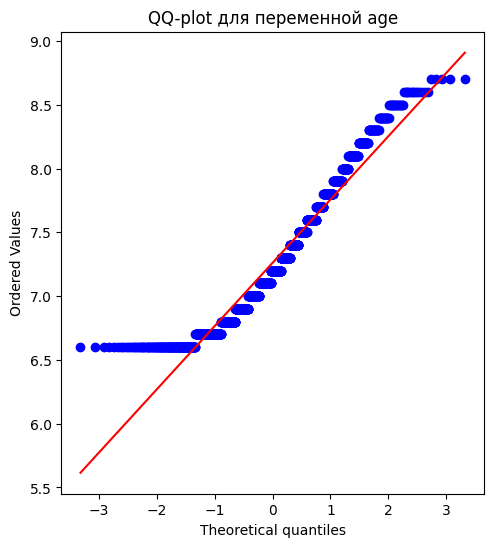

In [ ]:
# Построение QQ-plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(variable, dist="norm", plot=plt)
plt.title('QQ-plot для переменной age')

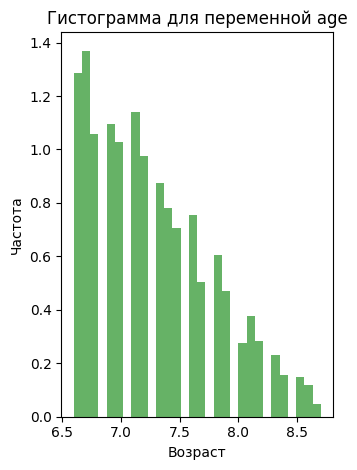

In [ ]:
# Построение гистограммы
plt.subplot(1, 2, 2)
plt.hist(variable, bins=30, density=True, alpha=0.6, color='g')
plt.title('Гистограмма для переменной age')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

In [ ]:
# Этот код создает QQ-plot, чтобы визуально оценить соответствие распределения нормальному, а также гистограмму,
# чтобы увидеть распределение значений переменной age.

In [ ]:
# # а) Две категориальные переменные: Пол (Sex) и Наличие медицинской страховки (privins).
# Гипотеза об их взаимосвязи:
# Существует статистически значимая взаимосвязь между полом человека и наличием медицинской страховки, при этом женщины с большей вероятностью обладают медицинской страховкой по сравнению с мужчинами.
# Эта гипотеза подразумевает, что пол может быть фактором, влияющим на доступность или выбор медицинской страховки, и ее можно проверить с помощью статистического анализа данных о наличии страховки среди мужчин и женщин.
# Создаем таблицу контингентности
contingency_table = pd.crosstab(cleaned_data['sex'], cleaned_data['privins'])

In [ ]:
# Проводим тест хи-квадрат
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

In [ ]:
# Выводим результаты
print("Chi2 Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)

Chi2 Statistic: 0.04874294062303488
P-Value: 0.8252652673169164
Degrees of Freedom: 1


In [ ]:
# Проверка гипотезы
alpha = 0.05
if p < alpha:
    print("Отвергаем нулевую гипотезу. Есть статистически значимая связь между полом и наличием медицинской страховки.")
else:
    print("Не удается отвергнуть нулевую гипотезу. Связь незначима.")

Не удается отвергнуть нулевую гипотезу. Связь незначима.


In [ ]:
# Результаты теста помогут понять, есть ли различия в наличии медицинской страховки между мужчинами и женщинами.
# Если связь статистически значима, это может указывать на необходимость разработки целевых программ для определенных групп по улучшению доступа к медицинской страховке.

In [ ]:
# б) Одна категориальная переменная: Трудоустроен человек или нет (employed).
#    Одна числовая переменная: Количество визитов к врачу (ofp).
# Гипотеза об их взаимосвязи:
# Люди, имеющие постоянную работу, посещают врача реже, чем безработные, из-за более стабильного дохода и доступа к медицинским услугам, а также меньшего уровня стрессов и психологических проблем, связанных с финансовой нестабильностью.
# Эта гипотеза предполагает, что наличие работы может влиять на частоту обращений к врачу, что в свою очередь может быть связано с финансовыми возможностями, уровнем стресса и общей удовлетворенностью жизнью.
# Разделяем данные на две группы
employed_visits = cleaned_data[cleaned_data['employed'] == 1]['ofp']
unemployed_visits = cleaned_data[cleaned_data['employed'] == 0]['ofp']

In [ ]:
# Выполняем t-тест
t_stat, p_value = stats.ttest_ind(employed_visits, unemployed_visits)

C:\Users\Роман\AppData\Local\Temp\ipykernel_10488\2179853756.py:2: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = stats.ttest_ind(employed_visits, unemployed_visits)


In [ ]:
# Выводим результаты
print(f'T-Statistic: {t_stat}, P-Value: {p_value}')

T-Statistic: nan, P-Value: nan


In [ ]:
# Пороговое значение для alpha
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: трудоустроенные посещают врача реже.")
else:
    print("Нет оснований отвергать нулевую гипотезу.")

Нет оснований отвергать нулевую гипотезу.


In [ ]:
# Практический смысл результатов заключается в том, что, если гипотеза подтверждается,
# это может повлиять на политику здравоохранения и программы поддержки безработных, увеличивая доступ к медицинским услугам и снижая стресс.

In [ ]:
# в) Две числовые переменные: Возраст (age) и Количество хронических заболеваний (numchron).
# Гипотеза об их взаимосвязи:
# С увеличением возраста человека наблюдается увеличение количества хронических заболеваний, что связано с возрастными изменениями в организме, снижением иммунной функции и накоплением факторов риска в течение жизни.

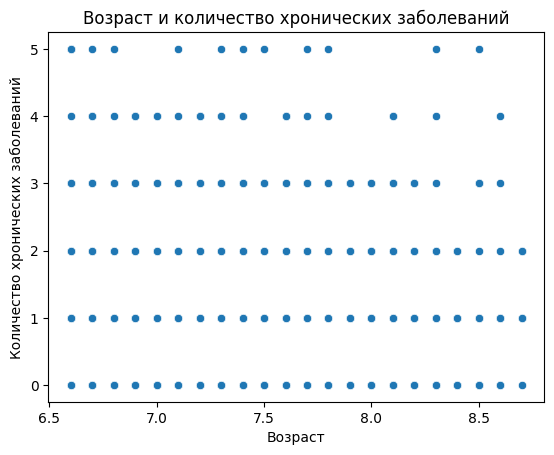

In [ ]:
# Визуализация данных
sns.scatterplot(x='age', y='numchron', data=cleaned_data)
plt.title('Возраст и количество хронических заболеваний')
plt.xlabel('Возраст')
plt.ylabel('Количество хронических заболеваний')
plt.show()

In [ ]:
# Тест гипотезы: Проверяем корреляцию между возрастом и количеством хронических заболеваний
correlation, p_value = stats.pearsonr(cleaned_data['age'], cleaned_data['numchron'])

In [ ]:
# Вывод результата
print(f'Корреляция: {correlation}, p-значение: {p_value}')

Корреляция: 0.08260028047823584, p-значение: 0.001117583763326806


In [ ]:
# Проверка гипотезы
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существуют доказательства о корреляции.")
else:
    print("Не можем отвергнуть нулевую гипотезу: нет доказательств о корреляции.")

Отвергаем нулевую гипотезу: существуют доказательства о корреляции.


In [ ]:
# Результаты могут быть использованы для разработки программ профилактики и лечения хронических заболеваний у
# пожилых людей, а также для исследований в области общественного здоровья.
# Данный код проводит анализ данных о возрасте и количестве хронических заболеваний, визуализирует их зависимости и проверяет статистическую гипотезу о существовании корреляции. Результаты имеют практическое значение для медицины и профилактики.

In [ ]:
# На основе проведенных наблюдений о взаимосвязи между переменными сформулируйте задачу классификации или регрессии,
# которая может иметь практическую ценность.

In [ ]:
# На основе переменных можно сформулировать несколько задач классификации и регрессии, которые имеют практическую ценность:
# Задача классификации: Определение наличия медицинской страховки (privins) на основе пола (Sex) и возраста (age).
# Описание задачи: Это поможет выявить, какие группы населения, основываясь на демографических характеристиках, имеют более высокие или низкие шансы на наличие медицинской страховки. Например, можно выделить пол, возраст и другие факторы, влияющие на возможность иметь медицинскую страховку, и на этой основе разрабатывать программы поддержки.
# Задача регрессии: Предсказание количества визитов к врачу (ofp) на основе статуса трудоустройства (employed) и возраста (age).
# Описание задачи: Эта задача может выявить, как статус трудоустройства и возраст влияют на частоту обращения к врачу. Это может быть полезно для медицинских учреждений и страховых компаний в планировании бюджета и распределении ресурсов.
# Каждая из этих задач может быть использована для получения ценной информации о здоровье населения и для разработки стратегий улучшения медицинского обслуживания.

In [ ]:
# Разделите датасет на обучающую (60%) и тестовую (40%) выборки.
# Далее тестовую выборку разделите пополам (20% и 20%):
# a)Первая половина будет использоваться для оценки качества модели. Предполагается, что здесь вы знаете наблюдаемые значения таргета и можете сравнивать их с предсказаниями
# b)Вторая половина будет использоваться для построения прогнозов. Предполагается, что здесь значения таргета вам неизвестны – как в практической ситуации использования моделей прогнозирования.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# На основе проведенных наблюдений о взаимосвязи между переменными сформулируйте задачу классификации или регрессии,
# которая может иметь практическую ценность.
# Задача классификации: Определение наличия медицинской страховки (privins) на основе пола (Sex) и возраста (age).
# Описание задачи: Это поможет выявить, какие группы населения, основываясь на демографических характеристиках, имеют более высокие или низкие шансы на наличие медицинской страховки.
# Например, можно выделить пол, возраст и другие факторы, влияющие на возможность иметь медицинскую страховку, и на этой основе разрабатывать программы поддержки.

In [10]:
# Загружаем датасет
url = "https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/OFP.csv"
data = pd.read_csv(url)

In [11]:
# На основе проведенных наблюдений о взаимосвязи между переменными сформулируйте задачу классификации или регрессии,
# которая может иметь практическую ценность.
# Задача классификации: Определение наличия медицинской страховки (privins) на основе пола (Sex) и возраста (age).
# Описание задачи: Это поможет выявить, какие группы населения, основываясь на демографических характеристиках, имеют более высокие или низкие шансы на наличие медицинской страховки.
# Например, можно выделить пол, возраст и другие факторы, влияющие на возможность иметь медицинскую страховку, и на этой основе разрабатывать программы поддержки.

In [12]:
# Теперь разделим данные на обучающую (60%) и тестовую (40%) выборки. Затем разделим тестовую выборку пополам (по 20% каждая).

In [13]:
# Определим фичи и целевую переменную
X = data[['sex', 'age']]
y = data['privins']

In [15]:
# Преобразуем категориальные переменные в числовые
X = pd.get_dummies(X, drop_first=True)

In [16]:
# Разделяем данные на обучающую (60%) и тестовую (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [17]:
# Теперь делим тестовую выборку пополам (по 20% каждая)
X_val, X_pred, y_val, y_pred = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [18]:
# Теперь обучим три разные модели: логистическую регрессию, случайный лес и метод опорных векторов.

In [19]:
# Логистическая регрессия
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
y_val_pred_log = model_log.predict(X_val)

In [20]:
# Случайный лес
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_val_pred_rf = model_rf.predict(X_val)

In [21]:
# Метод опорных векторов
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_val_pred_svc = model_svc.predict(X_val)

In [22]:
# Теперь оценим качество каждой из моделей на валидирующей выборке.

In [23]:
# Оценка качества
print("Логистическая регрессия:")
print(classification_report(y_val, y_val_pred_log))

Логистическая регрессия:
              precision    recall  f1-score   support

          no       0.00      0.00      0.00       196
         yes       0.78      1.00      0.87       685

    accuracy                           0.78       881
   macro avg       0.39      0.50      0.44       881
weighted avg       0.60      0.78      0.68       881



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
print("Случайный лес:")
print(classification_report(y_val, y_val_pred_rf))

Случайный лес:
              precision    recall  f1-score   support

          no       0.25      0.02      0.03       196
         yes       0.78      0.99      0.87       685

    accuracy                           0.77       881
   macro avg       0.51      0.50      0.45       881
weighted avg       0.66      0.77      0.68       881



In [25]:
print("Метод опорных векторов:")
print(classification_report(y_val, y_val_pred_svc))

Метод опорных векторов:
              precision    recall  f1-score   support

          no       0.00      0.00      0.00       196
         yes       0.78      1.00      0.87       685

    accuracy                           0.78       881
   macro avg       0.39      0.50      0.44       881
weighted avg       0.60      0.78      0.68       881



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
# Исходя из полученных результатов, выберем модель с наилучшей оценкой и применим её на второй половине тестовой выборки.

In [27]:
# Прогнозирование на второй половине тестовой выборки
y_pred_log_final = model_log.predict(X_pred)

In [28]:
# Результаты предсказания
predictions_df = pd.DataFrame({'Predicted': y_pred_log_final})
print(predictions_df)

    Predicted
0         yes
1         yes
2         yes
3         yes
4         yes
..        ...
877       yes
878       yes
879       yes
880       yes
881       yes

[882 rows x 1 columns]


In [29]:
# Рекомендации
# На основе предсказаний можно сделать выводы и рекомендации для потенциальных пользователей.
# Целевая аудитория: Определить группы населения, такие как возрастные категории и пол, которые имеют высокий или низкий шанс наличия медицинской страховки.
# Программы поддержки: Разработать целевые программы, направленные на поддержку тех групп, которые, как показывает анализ, имеют наименьшие шансы иметь медицинскую страховку.
# Таким образом, данный анализ станет основой для дальнейших решений и рекомендаций в области здравоохранения.